<a href="https://colab.research.google.com/github/KaraboLetsholo/Miway-Hackathon-2025/blob/main/Miway_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git-repository Stuff

This is just a code section to push the contents of this notebook to a github repo to track changes and save versions.

In [44]:
!pip install git
!git init .
!git remote add origin https://github.com/KaraboLetsholo/Miway-Hackathon-2025

ERROR: Could not find a version that satisfies the requirement git (from versions: none)
ERROR: No matching distribution found for git
Reinitialized existing Git repository in /content/.git/
error: remote origin already exists.


In [45]:
!git push --set-upstream origin master

error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/KaraboLetsholo/Miway-Hackathon-2025'


# Importing important modules
Below I'm importing all the **libraries** and **modules** that I will need such as **pandas** for reading and writing csv files, **numpy** for handling and amnipulating arrays, **matplotlib/seaborn** for data visualization and **sklearn** to implement simple models.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn as sk

# Reading in the Data
Below is a code snippet that will read-in the data from the csv files that were provided by the Miway hackathon team using **pandas**. The data files will be converted into **dataframes** which are easy to handle and visualize.

In [97]:
train_data = pd.read_csv(r"/content/hackathon_train_data_with_new_exposure.csv")
train_data.head()

,id,age,acq_chan,airbags,car_year,dist_trvld,empl_type,financed,gear_type,hp,...,province,carcolour,sum_insurd,tar_weight,exposure,gender,new_used,excess,dob,lic_date
0,A6511156292088,58,Inbound,0,2025,23660.869112,Sector C,N,Manual,109,...,WC,Red,330400,2066,645,Male,New,59050,1965-11-15,1983-12-14
1,A0107185112086,22,Outbound,0,2016,39160.524058,Sector D,N,Automatic,76,...,WC,Blue,155700,1790,1129,Female,New,2900,2001-07-18,2020-06-03
2,A7306306522081,50,Inbound,0,2025,17726.575543,Sector D,Y,NaN,43,...,MP,White,451800,1478,349,Female,New,135550,1973-06-30,1994-09-27
3,A7806237411189,45,Inbound,2,2015,22897.363186,Sector A,Y,Manual,174,...,KZN,Silver,210700,1736,437,Male,New,3850,1978-06-23,1996-06-30
4,A6607218328082,57,Outbound,6+,2015,17239.828544,Sector B,Y,Automatic,66,...,NW,Silver,536700,967,286,Male,New,2600,1966-07-21,1986-02-07


In [98]:
train_claims = pd.read_csv(r"/content/hackathon_train_claims.csv")
train_claims.head()

,id,amount,claim_no,claim_cause
0,A9808109067089,55179.162605,1,accident
1,A0201107209086,390.000000,2,accident
2,A9605015905083,19608.584955,3,accident
3,A0204136881180,80448.514984,4,accident
4,A0204136881180,117180.088801,5,accident


In [99]:
catastrophe_claims = pd.read_csv(r"/content/historical_catastrophe_claims.csv")
catastrophe_claims.head()

,Year,Province,Catastrophe_Claims
0,1995,GP,0.051877
1,2000,GP,0.048932
2,2005,GP,0.064498
3,2010,GP,0.063537
4,2015,GP,0.054427


# Data Preparations and Analysis
In the following section we look at the data and combine certain datasets to get a complete dataset with the know ids and claimed amounts.

In [100]:
train_data.shape

(2000000, 26)

In [101]:
train_claims.shape

(358119, 4)

In [102]:
catastrophe_claims.shape

(63, 3)

In [103]:
is_in_list = train_claims['id'].isin(train_data['id'])

In [104]:
idx = is_in_list.index[is_in_list  == True].tolist()

In [105]:
X_train = train_data.iloc[idx]

In [106]:
X_claims = train_claims

In [107]:
X = pd.concat([X_train, X_claims], axis=1)
X = X.dropna()

In [108]:
X.head()

,id,age,acq_chan,airbags,car_year,dist_trvld,empl_type,financed,gear_type,hp,...,exposure,gender,new_used,excess,dob,lic_date,id,amount,claim_no,claim_cause
0,A6511156292088,58,Inbound,0,2025,23660.869112,Sector C,N,Manual,109,...,645,Male,New,59050,1965-11-15,1983-12-14,A9808109067089,55179.162605,1,accident
1,A0107185112086,22,Outbound,0,2016,39160.524058,Sector D,N,Automatic,76,...,1129,Female,New,2900,2001-07-18,2020-06-03,A0201107209086,390.000000,2,accident
4,A6607218328082,57,Outbound,6+,2015,17239.828544,Sector B,Y,Automatic,66,...,286,Male,New,2600,1966-07-21,1986-02-07,A0204136881180,117180.088801,5,accident
5,A7609298068082,47,Broker,0,2019,21440.205966,Sector C,Y,Automatic,198,...,423,Female,New,12100,1976-09-29,1994-10-12,A0204136881180,6468.216080,6,accident
6,A9808109067089,25,Broker,2,2025,31717.987251,Sector D,Y,Automatic,122,...,609,Female,New,1000,1998-08-10,2016-12-30,A0201218200081,2800.000000,7,accident


# Fitting a Prelim Model : XGBoost
I will fit a preliminary model below, I will use XGBoost becuase this is a regression problem and I need to rank my features.

In [59]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [109]:
y = X['amount']
X = X.drop(columns=['amount'])

In [110]:
X['dob'] = pd.to_datetime(X['dob'])
X['Year_ob'] = X['dob'].dt.year
X['Month_ob'] = X['dob'].dt.month
X['Day_ob'] = X['dob'].dt.day

In [111]:
X['lic_date'] = pd.to_datetime(X['lic_date'])
X['Year_lic_date'] = X['lic_date'].dt.year
X['Month_lic_date'] = X['lic_date'].dt.month
X['Day_lic_date'] = X['lic_date'].dt.day

In [112]:
X['acq_chan'] = X['acq_chan'].astype('category')
X['id'] = X['id'].astype('category')
X['airbags'] = X['airbags'].astype('category')
X['empl_type'] = X['empl_type'].astype('category')
X['financed'] = X['financed'].astype('bool')
X['gear_type'] = X['gear_type'].astype('category')
X['car_make'] = X['car_make'].astype('category')
X['marital_st'] = X['marital_st'].astype('category')
X['no_gears'] = X['no_gears'].astype('category')
X['past_ins'] = X['past_ins'].astype('bool')
X['province'] = X['province'].astype('category')
X['carcolour'] = X['carcolour'].astype('category')
X['gender'] = X['gender'].astype('category')
X['new_used'] = X['new_used'].astype('category')
X['claim_cause'] = X['claim_cause'].astype('category')
X['Year_lic_date'] = X['lic_date'].astype("int")
X['Month_lic_date'] = X['lic_date'].astype("int")
X['Day_lic_date'] = X['lic_date'].astype("int")
X['Year_ob'] = X['dob'].astype("int")
X['Month_ob'] = X['dob'].astype("int")
X['Day_ob'] = X['dob'].astype("int")

In [113]:
X = X.drop(columns=['id', 'acq_chan', 'airbags', 'empl_type',
  'financed', 'gear_type', 'car_make',
  'marital_st', 'no_gears', 'past_ins',
  'province', 'carcolour', 'gender', 'new_used',
  'dob', 'lic_date', 'id', 'claim_cause', 'claim_no'])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, learning_rate=0.01, max_depth=7)

In [67]:
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
y_pred = xg_model.predict(X_test)

In [69]:
rmse = mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse}")

RMSE: 5758689890.408888


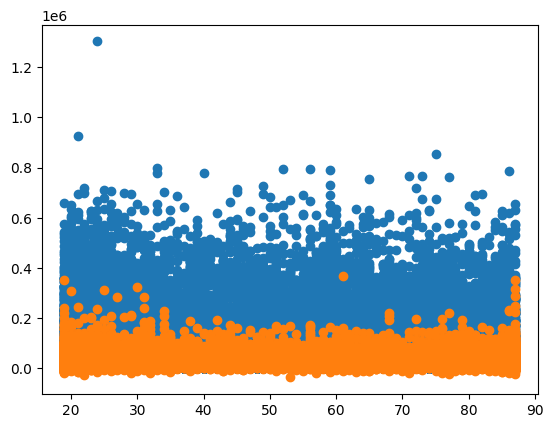

In [70]:
plt.scatter(X_test['age'], y_test)
plt.scatter(X_test['age'], y_pred)

In [71]:
corr = X.corr()

<Axes: >

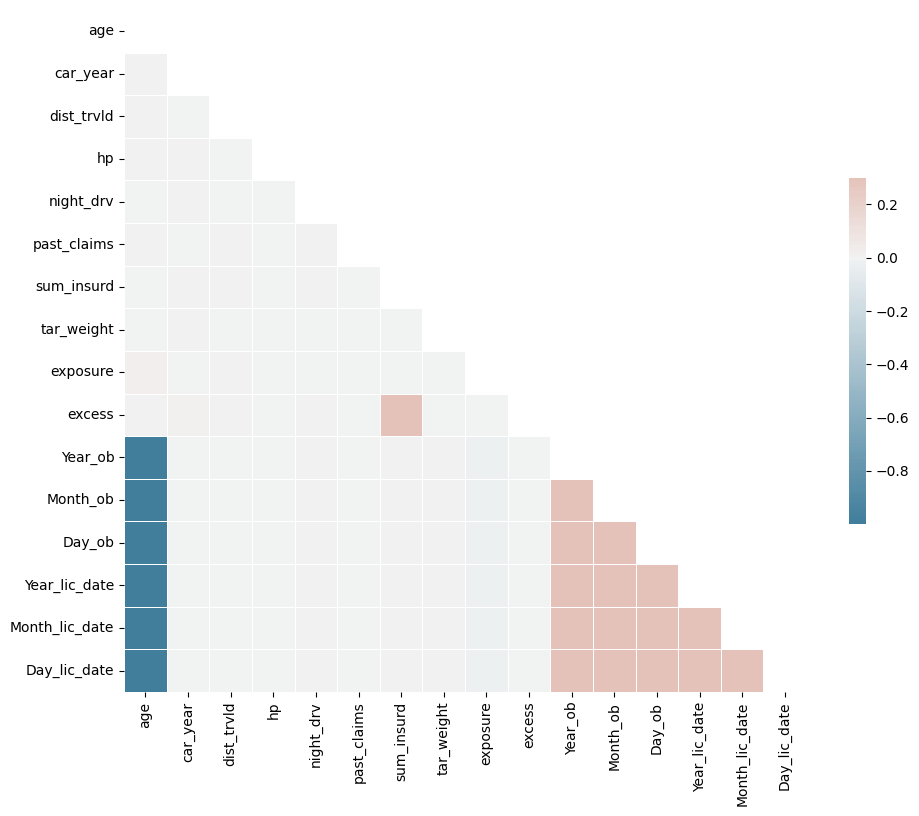

In [72]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Predictions
Now I predict for year 0

In [73]:
data = pd.read_csv(r"/content/hackathon_predictions_data.csv")
data.head()

,id,age,acq_chan,airbags,car_year,dist_trvld,empl_type,financed,gear_type,hp,...,past_ins,province,carcolour,sum_insurd,tar_weight,gender,new_used,excess,dob,lic_date
0,A6809169481080,56,Inbound,2,2015,40110.894986,Sector D,Y,NaN,95,...,Y,EC,Black,82700,1593,Female,Used,3000,1968-09-16,1986-09-28
1,A6502248339086,59,Outbound,6,2015,25127.294872,Sector C,Y,Manual,47,...,N,EC,Yellow,224500,1945,Female,New,1300,1965-02-24,1983-05-14
2,A5304288043285,71,Inbound,0,2017,40922.890982,Sector D,Y,Manual,104,...,Y,FS,Black,506700,1349,Male,New,26800,1953-04-28,1971-05-31
3,A7009045722083,54,Broker,6,2019,25974.283504,Sector B,Y,Manual,126,...,N,WC,White,194500,1419,Male,Used,1000,1970-09-04,1988-10-24
4,A5002116238081,74,Broker,6,2014,20549.074442,Sector D,N,Manual,132,...,Y,GP,White,319800,1309,Female,Used,18600,1950-02-11,1968-03-09


In [74]:
data['dob'] = pd.to_datetime(data['dob'])
data['Year_ob'] = data['dob'].dt.year
data['Month_ob'] = data['dob'].dt.month
data['Day_ob'] = data['dob'].dt.day

In [75]:
data['lic_date'] = pd.to_datetime(data['lic_date'])
data['Year_lic_date'] = data['lic_date'].dt.year
data['Month_lic_date'] = data['lic_date'].dt.month
data['Day_lic_date'] = data['lic_date'].dt.day

In [76]:
data['acq_chan'] = data['acq_chan'].astype('category')
data['id'] = data['id'].astype('category')
data['airbags'] = data['airbags'].astype('category')
data['empl_type'] = data['empl_type'].astype('category')
data['financed'] = data['financed'].astype('bool')
data['gear_type'] = data['gear_type'].astype('category')
data['car_make'] = data['car_make'].astype('category')
data['marital_st'] = data['marital_st'].astype('category')
data['no_gears'] = data['no_gears'].astype('category')
data['past_ins'] = data['past_ins'].astype('bool')
data['province'] = data['province'].astype('category')
data['carcolour'] = data['carcolour'].astype('category')
data['gender'] = data['gender'].astype('category')
data['new_used'] = data['new_used'].astype('category')
#data['claim_cause'] = data['claim_cause'].astype('category')
data['Year_lic_date'] = data['lic_date'].astype("int")
data['Month_lic_date'] = data['lic_date'].astype("int")
data['Day_lic_date'] = data['lic_date'].astype("int")
data['Year_ob'] = data['dob'].astype("int")
data['Month_ob'] = data['dob'].astype("int")
data['Day_ob'] = data['dob'].astype("int")

In [77]:
data = data.drop(columns=['id', 'acq_chan', 'airbags', 'empl_type',
  'financed', 'gear_type', 'car_make',
  'marital_st', 'no_gears', 'past_ins',
  'province', 'carcolour', 'gender', 'new_used',
  'dob', 'lic_date', 'id'])

In [78]:
data = data.reindex(X.columns, axis=1)

In [79]:
year_1 = xg_model.predict(data)

In [81]:
re_data = pd.read_csv(r"/content/hackathon_predictions_data.csv")
final_year_1 = pd.concat([re_data['id'], pd.DataFrame(year_1, columns=['premium'])], axis=1)

In [82]:
final_year_1

,id,premium
0,A6809169481080,18826.705078
1,A6502248339086,32369.642578
2,A5304288043285,22437.755859
3,A7009045722083,23893.421875
4,A5002116238081,21721.093750
...,...,...
499995,A9605047336182,33289.640625
499996,A9610166223088,40463.347656
499997,A6906285253086,13104.200195
499998,A9006087364087,98661.382812


In [83]:
# Save the DataFrame to a CSV file
final_year_1.to_csv('output_year_1.csv', index=False)

# Predicting the Frequency
Now that I can predict the amount claimed which is the severity, I can predict the frequency to calculate the premium.

In [114]:
freq = X['past_claims'].value_counts(normalize=True)

In [129]:
X['past_claims'] = train_data['past_claims']

In [134]:
X_new = X#.loc[X['past_claims'] == 0, 'past_claims'] = 99

In [135]:
X_new['past_claims'] = np.where(X['past_claims'] == 0, 0.298757, X['past_claims'])
X_new['past_claims'] = np.where(X['past_claims'] == 1, 0.448981, X['past_claims'])
X_new['past_claims'] = np.where(X['past_claims'] == 2, 0.152128, X['past_claims'])
X_new['past_claims'] = np.where(X['past_claims'] == 3, 0.059702, X['past_claims'])
X_new['past_claims'] = np.where(X['past_claims'] == 4, 0.030243, X['past_claims'])
X_new['past_claims'] = np.where(X['past_claims'] == 5, 0.010189, X['past_claims'])

In [136]:
X_new['past_claims']

,past_claims
0,0.448981
1,0.298757
4,0.298757
5,0.448981
6,0.152128
...,...
358114,0.059702
358115,0.448981
358116,0.059702
358117,0.298757


In [137]:
y_new = X_new['past_claims']
X_new = X_new.drop(columns=['past_claims'])

In [138]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [139]:
xg_model_freq = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10000, learning_rate=0.01, max_depth=7)

In [140]:
xg_model_freq.fit(X_new_train, y_new_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [141]:
y_freq = xg_model_freq.predict(X_new_test)

In [142]:
data_new = data.drop(columns=['past_claims'])

In [145]:
year_1_freq = xg_model_freq.predict(data_new)

In [146]:
year_1*year_1_freq

array([ 5978.7705, 11488.3545,  7389.474 , ...,  4544.994 , 34108.72  ,
        4266.5737], dtype=float32)

In [147]:
final_premiums = pd.concat([re_data['id'], pd.DataFrame(year_1*year_1_freq, columns=['premium'])], axis=1)

In [148]:
final_premiums

,id,premium
0,A6809169481080,5978.770508
1,A6502248339086,11488.354492
2,A5304288043285,7389.474121
3,A7009045722083,7600.647949
4,A5002116238081,6706.336426
...,...,...
499995,A9605047336182,10904.239258
499996,A9610166223088,10558.432617
499997,A6906285253086,4544.994141
499998,A9006087364087,34108.718750


In [149]:
final_premiums.to_csv('premiums_year_2.csv', index=False)